In [ ]:
!pip3 install retentioneering

In [ ]:
import pandas as pd
import retentioneering
import numpy as np
import datetime as dt
from copy import deepcopy

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import io
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving A_group.csv to A_group (1).csv


In [ ]:
a = pd.read_csv(io.StringIO(uploaded['A_group.csv'].decode('utf-8')),sep=',')

In [ ]:
uploaded=files.upload()

Saving B_group.csv to B_group (1).csv


In [ ]:
b = pd.read_csv(io.StringIO(uploaded['B_group.csv'].decode('utf-8')),sep=',')

In [ ]:
a['InvoiceDate'] = pd.to_datetime(a['InvoiceDate']) #загружаем таблицу а и добавляем столбец Test,чтобы проставить метку данных А
a['Test']="A"
a.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Test
0,142009,548541,21231,4,2011-03-31 17:59:00,1.25,14957.0,A
1,142010,548541,22970,6,2011-03-31 17:59:00,2.55,14957.0,A
2,142011,548541,21164,1,2011-03-31 17:59:00,2.95,14957.0,A
3,142012,548541,82578,1,2011-03-31 17:59:00,0.55,14957.0,A
4,142013,548541,82580,1,2011-03-31 17:59:00,0.55,14957.0,A


In [ ]:
b['InvoiceDate'] = pd.to_datetime(b['InvoiceDate']) #загружаем таблицу b и добавляем столбец Test,чтобы проставить метку данных B
b['Test']="B"
b.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Test
0,0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,B
1,1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,B
2,2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,B
3,3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,B
4,4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,B


In [ ]:
data=pd.DataFrame(pd.concat([a, b], ignore_index=True)) #объединяем два таблицы с данными в одну для дальнейшей работы
data.head(1000000)

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Test
0,142009,548541,21231,4,2011-03-31 17:59:00,1.25,14957.0,A
1,142010,548541,22970,6,2011-03-31 17:59:00,2.55,14957.0,A
2,142011,548541,21164,1,2011-03-31 17:59:00,2.95,14957.0,A
3,142012,548541,82578,1,2011-03-31 17:59:00,0.55,14957.0,A
4,142013,548541,82580,1,2011-03-31 17:59:00,0.55,14957.0,A
...,...,...,...,...,...,...,...,...
541904,541868,581584,85038,48,2011-12-09 12:25:00,1.85,13777.0,B
541905,541890,581586,22061,8,2011-12-09 12:49:00,2.95,13113.0,B
541906,541891,581586,23275,24,2011-12-09 12:49:00,1.25,13113.0,B
541907,541892,581586,21217,24,2011-12-09 12:49:00,8.95,13113.0,B


In [ ]:
data['InvoiceDate'].min(), data['InvoiceDate'].max() #проверяем диапазон дат, когда проводился эксперимент

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [ ]:
data.groupby(['CustomerID', 'Test']).nunique().reset_index()['Test'].value_counts() #проверяем количество пользователей в каждом из двух сегментов

A    2187
B    2185
Name: Test, dtype: int64

Можно сказать, что в группах одинаковое количество пользователей

In [ ]:
data.groupby(['InvoiceDate'])['Test'].nunique().sort_values() #сортируем по датам

InvoiceDate
2010-12-01 08:26:00    1
2011-09-07 15:10:00    1
2011-09-07 15:07:00    1
2011-09-07 15:00:00    1
2011-09-07 14:56:00    1
                      ..
2011-09-04 12:07:00    2
2011-05-20 13:14:00    2
2011-11-30 15:43:00    2
2011-11-16 10:55:00    2
2011-09-23 12:38:00    2
Name: Test, Length: 23260, dtype: int64

In [ ]:
data['InvoiceDate'].value_counts()

2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-03-10 13:00:00       1
2011-03-10 13:04:00       1
2011-03-10 13:24:00       1
2011-03-10 13:26:00       1
2011-03-31 17:36:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

In [ ]:
def visualize_all_data(df):
    data = df.copy()
    
    min_date = data['InvoiceDate'].min()
    max_date = data['InvoiceDate'].max()
    #неделя события с начала наблюдений
    data['delta'] = (data['InvoiceDate'] - min_date).apply(lambda x: np.floor(x.days/7))

    #найдем для пользоваателей их даты присоединения:
    g_data = data.groupby('CustomerID').min().reset_index()
    #колонка delta - неделя присоединения с начала наблюдения:
    g_data['delta'] = (g_data['InvoiceDate'] - min_date).apply(lambda x: np.floor(x.days/7))

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    sns.distplot(g_data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    plt.xlabel('Недели с начала наблюдения')

    plt.legend(labels=["Все пользователи","Пользователи, пришедшие в эту неделю"])
    plt.show()
    print('начало наблюдения: '+ str(min_date))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


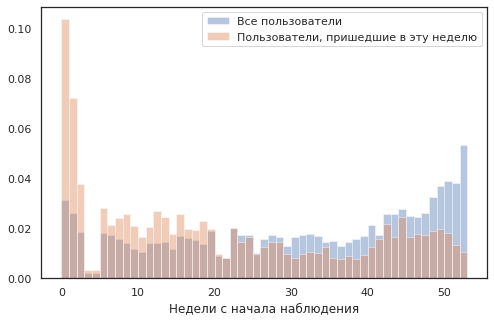

начало наблюдения: 2010-12-01 08:26:00


In [ ]:
visualize_all_data(data) #визуализируем данные 

Данные собирались год, поэтому сильно разная динамика поведения пользователей.

In [ ]:
#размер когорты (в этом примере этот параметр будет также использоваться как величина периода для наблюдений за когортой)
cohort_size = 210
#интервал времени между когортами для сравнения
interval_between_cohorts = 30

#найдем для пользователей их даты присоединения
g_data = data.groupby('CustomerID')['InvoiceDate'].first().reset_index()
#колонка delta - день присоединения с начала наблюдения
g_data['delta'] = (g_data['InvoiceDate'] - data['InvoiceDate'].min()).apply(lambda x: x.days)


#получим ИД  пользователей присоединившихся в первую неделю и во вторую
cohort_1_users = g_data[g_data['delta']<cohort_size]['CustomerID'].unique()
cohort_2_users = g_data.loc[(g_data['delta']>=interval_between_cohorts) &
                            (g_data['delta']<interval_between_cohorts+cohort_size)]['CustomerID'].unique()

data_c1 = data[data['CustomerID'].isin(cohort_1_users)].copy()
data_c2 = data[data['CustomerID'].isin(cohort_2_users)].copy()

In [ ]:
def visualize_users(df): #функция визуализации данных, чтобы посомтреть на графике пришедших пользователей
    data = df.copy()
    min_date = data['InvoiceDate'].min()

    g_data = data.groupby('CustomerID').min().reset_index()
    g_data['delta'] = (g_data['InvoiceDate'] - min_date).apply(lambda x: x.days/7)

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})

    sns.distplot(g_data['delta'], kde=False,bins=2, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения когортой')

    plt.legend(labels=["Пользователи, пришедшие в эту неделю"])
    plt.xlim([0,53])
    plt.show()
    print('начало наблюдения за когортой: '+ str(min_date))

def visualize_purchases(df):
    data = df.copy()
    min_date = data['InvoiceDate'].min()
    max_date = data['InvoiceDate'].max()

    data['delta'] = (data['InvoiceDate'] - min_date).apply(lambda x: np.floor(x.days/7))


    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения за когортой')

    plt.legend(labels=["Все пользователи"])
    plt.xlim([0,53])
    plt.show()
    print('начало наблюдения за когортой: '+ str(min_date))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


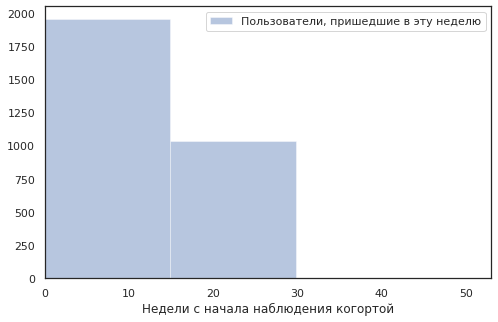

начало наблюдения за когортой: 2010-12-01 08:26:00


In [ ]:
visualize_users(data_c1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


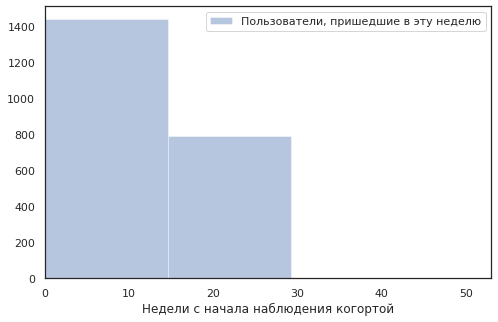

начало наблюдения за когортой: 2011-01-04 10:00:00


In [ ]:
 visualize_users(data_c2)

In [ ]:
data_c1['CustomerID'].nunique(), data_c2['CustomerID'].nunique()

(2990, 2227)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


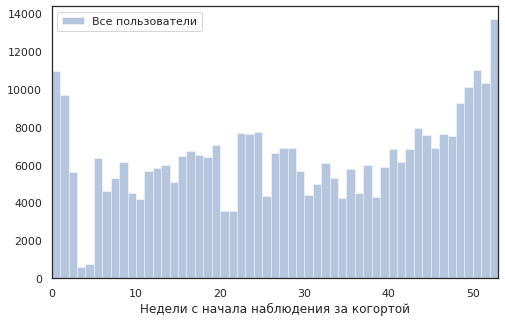

начало наблюдения за когортой: 2010-12-01 08:26:00


In [ ]:
visualize_purchases(data_c1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


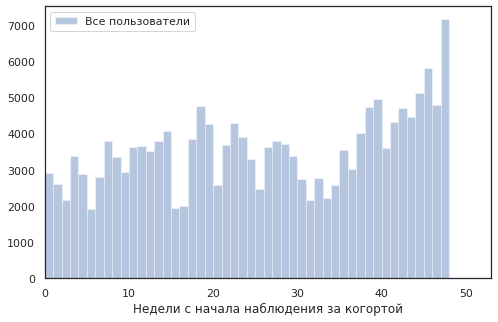

начало наблюдения за когортой: 2011-01-04 10:00:00


In [ ]:
visualize_purchases(data_c2)

После разделения данных о поведении пользователей по когортам, мы видим что когорта 1 содержит больше активных пользователей , чем когорта 2. Но в целом разница не большая, динамика одинаковая.


In [ ]:
data.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Test
0,142009,548541,21231,4,2011-03-31 17:59:00,1.25,14957.0,A
1,142010,548541,22970,6,2011-03-31 17:59:00,2.55,14957.0,A
2,142011,548541,21164,1,2011-03-31 17:59:00,2.95,14957.0,A
3,142012,548541,82578,1,2011-03-31 17:59:00,0.55,14957.0,A
4,142013,548541,82580,1,2011-03-31 17:59:00,0.55,14957.0,A


In [ ]:
#найдем для пользоваателей групп А и B их даты присоединения:
data1 = data.groupby('CustomerID')['InvoiceDate'].first().to_frame()

#колонка JoinDay - день присоединения с начала наблюдения:
data1['JoinDay'] = (data1['InvoiceDate'] - data['InvoiceDate'].min()).apply(lambda x: x.days)


In [ ]:
data['acquisition_day'] = data['CustomerID'].map(data1['JoinDay'].to_dict())
data.head (1)

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Test,acquisition_day
0,142009,548541,21231,4,2011-03-31 17:59:00,1.25,14957.0,A,120.0


In [ ]:
rete_period = 30 #выбираем период в 30 дней - примерно месяц
data['JoinDay'] = (data['InvoiceDate']-data['InvoiceDate'].min()).apply(lambda x: x.days)
data['acquisition_period'] = data['acquisition_day'].apply(lambda  x: np.floor(x / rete_period))
data['activity_month'] = data['JoinDay'].apply(lambda  x: np.floor(x / rete_period))
data['lifetime_period'] =  data['activity_month'] - data['acquisition_period']
data.head(1)


,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Test,acquisition_day,JoinDay,acquisition_period,activity_month,lifetime_period
0,142009,548541,21231,4,2011-03-31 17:59:00,1.25,14957.0,A,120.0,120,4.0,4.0,0.0


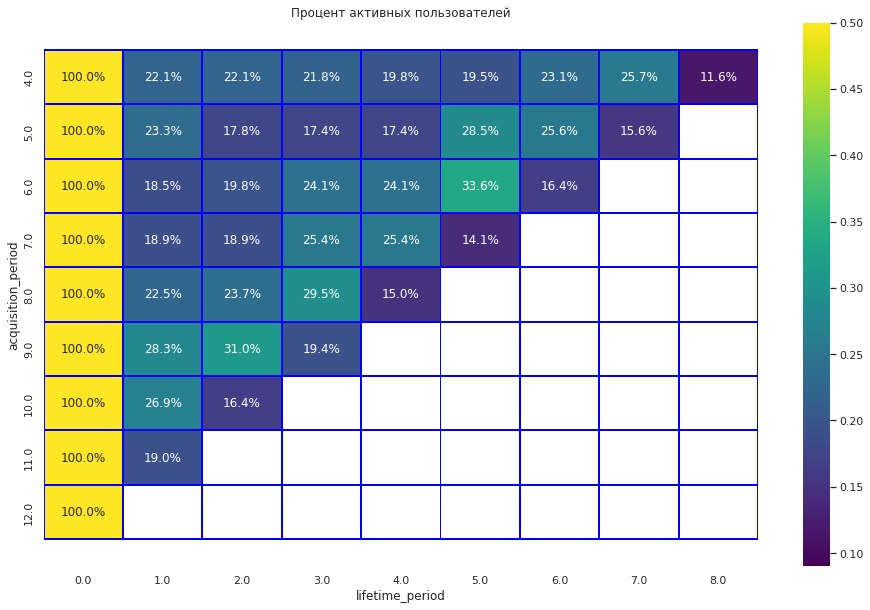

In [ ]:
cohorts_a = data[data['Test'] == "A"].groupby(['acquisition_period','lifetime_period']).agg({'CustomerID':'nunique'}).reset_index() #строим график по активным пользователям для сегмента А

inital_users_count_a = cohorts_a[cohorts_a['lifetime_period'] == 0][['acquisition_period','CustomerID']]
inital_users_count_a = inital_users_count_a.rename(columns={'CustomerID':'cohort_users'})

cohorts_a = cohorts_a.merge(inital_users_count_a,on='acquisition_period')
cohorts_a['metric'] = cohorts_a['CustomerID']/cohorts_a['cohort_users']

cohort_metric_pivot_a = cohorts_a.pivot_table(index='acquisition_period',
                                      columns='lifetime_period',
                                      values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Процент активных пользователей')
sns.heatmap(cohort_metric_pivot_a, annot=True, fmt='.1%', linewidths=1, linecolor= 'blue', cmap='viridis',
            vmin=0.09, vmax=0.5,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

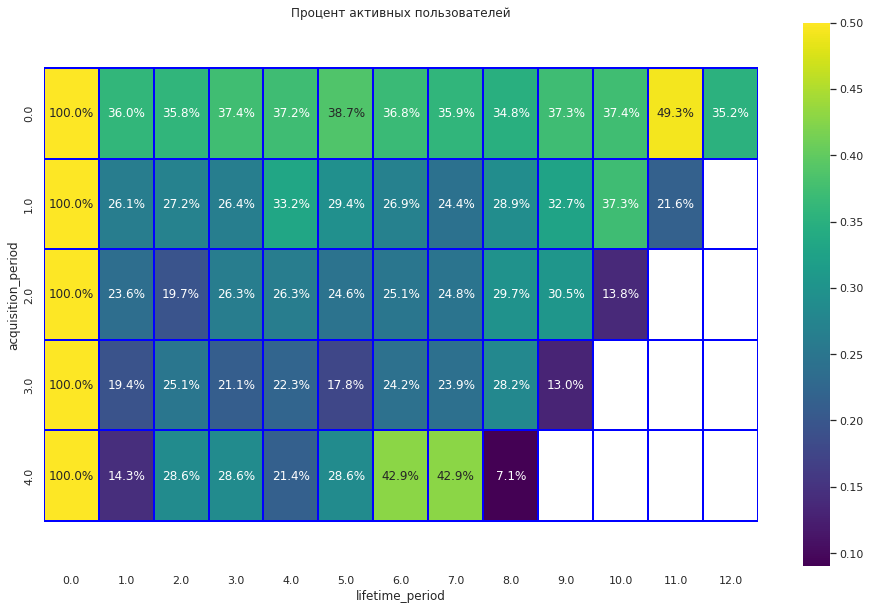

In [ ]:
cohorts_a = data[data['Test'] == "B"].groupby(['acquisition_period','lifetime_period']).agg({'CustomerID':'nunique'}).reset_index()#строим график по активным пользователям для сегмента B

inital_users_count_a = cohorts_a[cohorts_a['lifetime_period'] == 0][['acquisition_period','CustomerID']]
inital_users_count_a = inital_users_count_a.rename(columns={'CustomerID':'cohort_users'})

cohorts_a = cohorts_a.merge(inital_users_count_a,on='acquisition_period')
cohorts_a['metric'] = cohorts_a['CustomerID']/cohorts_a['cohort_users']

cohort_metric_pivot_a = cohorts_a.pivot_table(index='acquisition_period',
                                      columns='lifetime_period',
                                      values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Процент активных пользователей')
sns.heatmap(cohort_metric_pivot_a, annot=True, fmt='.1%', linewidths=1, linecolor= 'blue', cmap='viridis',
            vmin=0.09, vmax=0.5,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

Конверсия в сегмента А ниже, чем в сегменте B. 

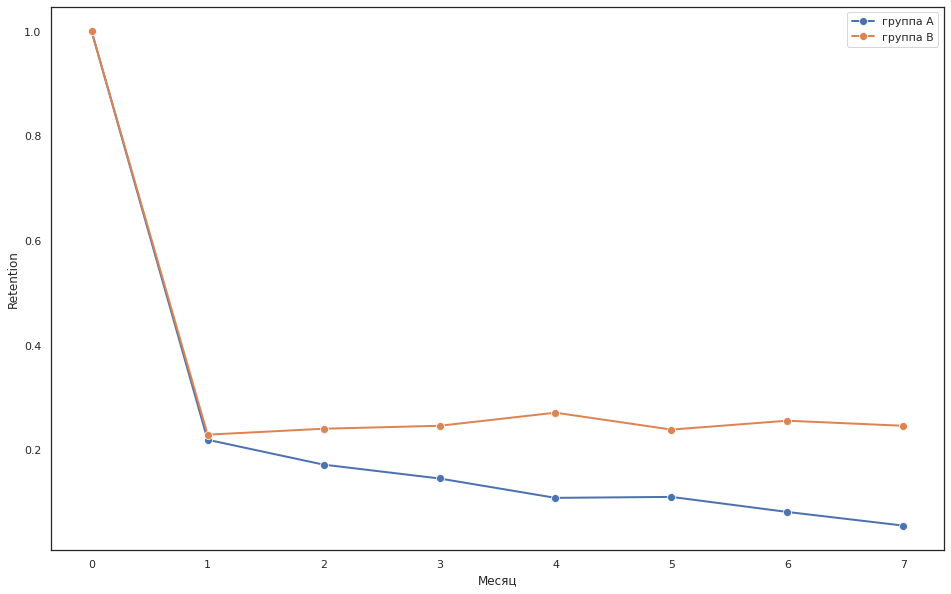

In [ ]:
group_b2 = data.loc[(data['acquisition_period'] != 0) & (data['lifetime_period'] <= 7)] #убираем первый месяц и ограничиваем 7 месяцами
group_a2 = data[data['lifetime_period'] <= 7] #ограничиваем 7 месяцами

retentionA =  group_a2[group_a2['Test'] == "A"].groupby('lifetime_period')['CustomerID'].apply(lambda x: len(set(x))) 
retentionB =  group_b2[group_b2['Test'] == "B"].groupby('lifetime_period')['CustomerID'].apply(lambda x: len(set(x)))


sns.lineplot(x = retentionA.index, y = retentionA.values/max(retentionA.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retentionB.index, y = retentionB.values/max(retentionB.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('Месяц')
plt.ylabel('Retention')

plt.legend(labels=["группа A","группа B"])
plt.show() 


Видно, что после изменений, внесенных в продукт, конверсия выросла по сравнению с сегментом А. Продолжать эксперимент дальше нет смысла, результаты получены. 